# 4. Training model
___

It's important to understand the inner workings of the different models to make the most of them.

## 4.1 Linear Regression

Let's strart with the Linear regression model, there are two ways of training it:

* Using a direct *closed_form* equation.
* Using an iterative optimization or gradient descent (GD).

The general linear model is a the weighted sum of the imput features plus a constant called the _bias term_:

$\hat{y}=\theta_0+\theta_1 x_1+\theta_2 x_2+\cdots +\theta_n x_n$

* $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_i$ is the $i^{th}$ feature value. 
* $\theta_j$ is the $j^{th}$ model parameter.

The vectorized form of the equation looks as follows:

$\hat{y}=h_\theta(x)=\theta^T\cdot x$

* $\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and all the feature weights.
* $x$ is the instance's feature vector, containing $x_0$ to $x_n$ where $x_0$ always equals to 1.
* $h_\theta$ is the hypothesis function, using the model parameters $\theta$

To train a Linear Regression model we can **find the value of $\theta$ that minimizes the MSE**, the vectorized MSE function looks as follows:

$MSE (X,h_\theta) = \tfrac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})^2$

One way to find the value of $\theta$ that minimizes the cost function is to use the **closed_form solution (Normal Equation)**.

 $\hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$


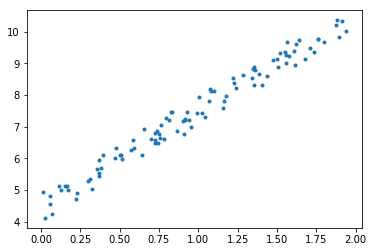

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100, 1)
y = 4+3*X + np.random.rand(100,1)

plt.scatter(X,y,marker='.')
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.5258214 ],
       [2.99149873]])

Now we can make predictions using $\hat{\theta}$:

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5258214 ],
       [10.50881885]])

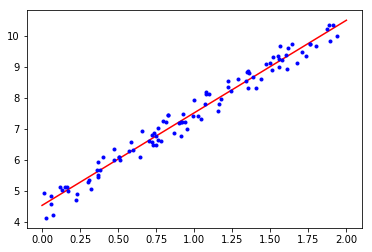

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.show()

The equivalent code using Scikit-Learn looks like:

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)


(array([4.5258214]), array([[2.99149873]]), array([[ 4.5258214 ],
        [10.50881885]]))

The normal equation has a computational complexity of about $O(n^3)$ which means that if you double the number of features you multiply the computation time by 5.3 to 8. Let's look at better ways to train a Linear Regression for cases where there are a large number of features or too many training instances to fit in memory.

Another way to minimize the MSE is using **Gradient Descent**, the general idea is to tweak parameters iteratively in order to minimize a cost function. An important parameter in GD is the size of the steps or _learning rate_. If the learning rate is too small the algorithm will have to go through many iterations to converge. On the other hand, if the learning rate is too high the algorithm might diverge.

Fortunately, the MSE cost function for a Linear Regression is a convex function. This implies that there is no local minima and that is a continuous function.

A way to implement a GD is with a **Batch Gradient Descent** in which you compute the gradient (partial derivative) of the cost function with regards to each model parameter. In other words how much the cost function will change if you change a single parameter a little bit.

$\frac{\partial}{\partial \theta_j}MSE(\theta)=\tfrac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_j^{(i)}$

$\nabla_\theta MSE(\theta) = \begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE(\theta)\\
    \frac{\partial}{\partial \theta_1}MSE(\theta)\\
    \vdots\\
    \frac{\partial}{\partial \theta_n}MSE(\theta)
\end{bmatrix}=\frac{2}{m}X^T\cdot (X\cdot \theta-y)$

$\theta^{(next\space step)}=\theta -\eta \nabla_\theta MSE(\theta)$

Where $\eta$ is the learning rate.

In [7]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    
theta

array([[4.5258214 ],
       [2.99149873]])

The effect of the learning step on the GD of the MSE can be seen in the next graphs:

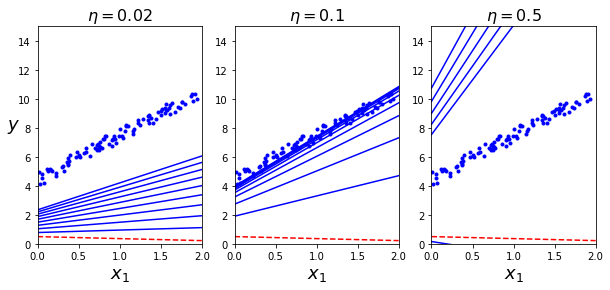

In [8]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

The main problem with batch GD is the fact that is uses the whole training set to compute the gradients at every step which makes it very slow when the training set is large. The **Stochastic Gradient Descent** picks random instances. This makes the algorithm much faster but decresses its regularity due to its random nature. If the learning rate starts in a high value and is decreased over time is called _simulated annealing_ and it helps to avoid local minima and increase precision.

In [13]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

thetha = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
theta

array([[4.52943302],
       [2.98348104]])

The implementation of SGD in Scikit looks as follows:

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48656184]), array([3.00348644]))

One last way to minimize the MSE is to use **Mini-batch Gradient Descent**. Mini-batch GD computes the gradients on small random sets of instances called mini-batches. Is less erratic than SGD and a lot faster than batch GD.

## 4.2 Polynomial Regression

Let's generate some nonlinear data based on a simple quadratic equation plus some noise.

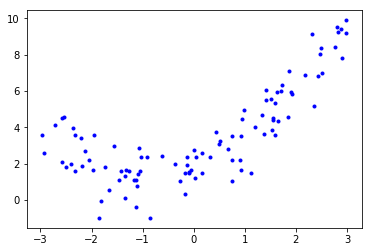

In [25]:
m =100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)
plt.plot(X,y,'b.')
plt.show()

We can add features to a linear regression to make it fit polynomials as follows:

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.83858362]), array([[1.00795656, 0.5491736 ]]))

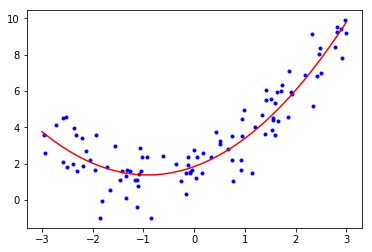

In [46]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r-')
plt.show()

If we decide to increase the degree of the polynomy we can overfit the data. How can we tell that our model is overfitting or undefitting the data?. Let's remeber that if a **model performs well on training data but generalizes poorly according to the cross-validation it is overfitting**. If it performs poorly on both it is underfitting. Another way to tell when a model is too simple or too complex is looking at the _**learning curves**_. These are plots of the model's performance in the training set and the validation set as a function of the training set size.

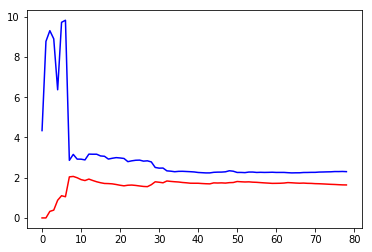

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-',label='train')
    plt.plot(np.sqrt(val_errors),'b-',label='val')
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Those were the learing curves of a simple linear regression, now let's see how a 10th degree polynom behaves:

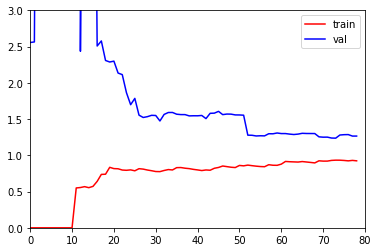

In [59]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression())
                                 ])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]); 
plt.legend();

As we can see the error is much lower than with the simple linear regression model. The gap between the curves means that the model is performing better on the training data a sign of overfitting. **The Bias/Variance Tradeoff** occurs when a model´s complexity in increased, the bias or generalization error decreses and the variance or ovefitting increses.

## 4.3 Regularized Linear Models

A good way to reduce overfitting is to regularize the model, the fewe degrees of freedom it has the harder it will overfit the data.

### 4.3.1 Ridge Regression

Is a regulatized version of Lineal Regression, a regularization term $\alpha\sum_{i=1}^{n}\theta_i^2$ is added and force the learning algorithm to keep the model weights as small as possible. The cost function of the Ridge Regression looks as follows:

$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}\theta_i^2$

And the Ridge Regression closed-fom solution is:

$\hat{\theta}=(X^T\cdot X+\alpha A)^{-1}\cdot X^T\cdot y$

Where $A$ is the identity matrix with a 0 in the top left cell. It's important to scale de data before performing Ridge Regression

In [60]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.03657094]])

In [62]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.03149558])

### 4.3.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression or Lasso is another regularized version of Linear Regression.

$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}\mid{\theta_i}\mid$

An important characteristic of the Lasso regretion is that it tends to eliminate the weights of the least important features

In [65]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.99317797])

### 4.3.3 Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a mix of both and you can control the mix ratio $r$. When $r=0", Elastic Net is equivalent to Ridge Regression.

$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^{n}\mid{\theta_i}\mid+\tfrac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$

Now we have to ask ourselves, when we should use Linear Regressio, Ridge, Lasso or Elastic Net? It's almost always preferable to have regularization, so in general we should always avoid plain linear regression. **Ridge is a good default**, but if you suspect that only a few features are actually useful you shoul prefer Lasso. **Generally Elastic Net is preferred over Lasso**

In [66]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.99243364])

### 4.3.4 Early Stopping

Consists in stopping training as soon as the validation error reaches a minimum.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\M

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\M

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\M

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\M

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\M

C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alejandro\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [74]:
best_epoch, best_model

(243,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))